# Verarbeitung, Analyse und Darstellung von Daten 

Python Bibliotheken (alle eignen sich hervorragend für die Verarbeitung sehr großer Datensätze):

Schnelle Datenanalyse und -manipulation - Pandas:
https://pandas.pydata.org/docs/

Bibliothek zur Datenvisualisierung insbesondere für statistische Grafiken - Seaborn:
https://seaborn.pydata.org/

Leistungsstarke Bibliothek für wissenschaftliches Rechnen - NumPy:
https://numpy.org/

Leistungsstarke Bibliothek mit grundlegenden Algorithmen für wissenschaftliches Rechnen:
https://scipy.org/

Datensatz der ZAMG - Zentralanstalt für Meteorologie und Geodynamik:
https://data.hub.zamg.ac.at/

In [ ]:
%pip install pandas
%pip install openpyxl
%pip install matplotlib
%pip install numpy
%pip install seaborn
%pip install scipy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
import scipy.stats as sp
from scipy.interpolate import interp1d 
import matplotlib.pyplot as plt
%matplotlib inline

Daten lesen

In [2]:
pfad = "ZAMG_GRAZ_Datensatz_20000101_20221207.csv"
df=pd.read_csv(pfad, parse_dates=['time'])
df=df.set_index('time')
df.head()

,station,D6X,LT2,PPX,RSD,RSX,SCH,SST,SUX,TT3,TT5,TTX,VKM,WSD,WSK
time,,,,,,,,,,,,,,,
2000-01-01 00:00:00,16412,331.0,NaN,979.0,NaN,0.0,NaN,NaN,0.0,NaN,4.9,-4.3,NaN,335.0,NaN
2000-01-01 01:00:00,16412,339.0,NaN,979.5,NaN,0.0,NaN,NaN,0.0,NaN,4.9,-4.9,NaN,322.0,NaN
2000-01-01 02:00:00,16412,337.0,NaN,979.7,NaN,0.0,NaN,NaN,0.0,NaN,4.9,-5.1,NaN,317.0,NaN
2000-01-01 03:00:00,16412,6.0,NaN,979.7,NaN,0.0,NaN,NaN,0.0,NaN,4.9,-4.6,NaN,355.0,NaN
2000-01-01 04:00:00,16412,342.0,NaN,979.6,NaN,0.0,NaN,NaN,0.0,NaN,4.9,-4.5,NaN,324.0,NaN


Daten bereinigen

In [3]:
df = df.dropna(axis=1, how='all')
df

,station,D6X,LT2,PPX,RSD,RSX,SUX,TT3,TT5,TTX,WSD
time,,,,,,,,,,,
2000-01-01 00:00:00,16412,331.0,NaN,979.0,NaN,0.0,0.0,NaN,4.9,-4.3,335.0
2000-01-01 01:00:00,16412,339.0,NaN,979.5,NaN,0.0,0.0,NaN,4.9,-4.9,322.0
2000-01-01 02:00:00,16412,337.0,NaN,979.7,NaN,0.0,0.0,NaN,4.9,-5.1,317.0
2000-01-01 03:00:00,16412,6.0,NaN,979.7,NaN,0.0,0.0,NaN,4.9,-4.6,355.0
2000-01-01 04:00:00,16412,342.0,NaN,979.6,NaN,0.0,0.0,NaN,4.9,-4.5,324.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-07 19:00:00,16412,123.0,2.8,970.4,0.0,0.0,0.0,7.1,NaN,3.2,171.0
2022-12-07 20:00:00,16412,168.0,2.9,970.3,0.0,0.0,0.0,7.1,NaN,3.1,236.0
2022-12-07 21:00:00,16412,176.0,2.6,970.3,0.0,0.0,0.0,7.1,NaN,2.6,155.0


Was bedeuten die Kürzel? - Metadaten

In [4]:
pfad_metadaten = "ZAMG_Parameter-Metadaten.csv"
df_meta=pd.read_csv(pfad_metadaten, quotechar = '*')
df_meta

,Identifier,Kurzbeschreibung,Beschreibung,Einheit
0,D2X,Windrichtung in Sektoren,Windrichtung in Sektoren: 32-teilig,NaN
1,D2X_qflag,Qualitätsqflag für D2X,Qualitätsqflag für D2X - Qualitätsflag={0-2: u...,NaN
2,D2X_typ,Qualitätstyp für D2X,Qualitätstyp für D2X - Qualitätsflag={0-2: nic...,NaN
3,D6X,Windrichtung,Windrichtung in ° - vektorielles Mittel aus 10...,°
4,D6X_qflag,Qualitätsqflag für D6X,Qualitätsqflag für D6X - Qualitätsflag={0-2: u...,NaN
...,...,...,...,...
88,WSX_qflag,Qualitätsqflag für WSX,Qualitätsqflag für WSX - Qualitätsflag={0-2: u...,NaN
89,WSX_typ,Qualitätstyp für WSX,Qualitätstyp für WSX - Qualitätsflag={0-2: nic...,NaN
90,WSZ,Zeit der Windspitze,Zeit der Windspitze - zum maximalen ffx gehör...,NaN
91,WSZ_qflag,Qualitätsqflag für WSZ,Qualitätsqflag für WSZ - Qualitätsflag={0-2: u...,NaN


In [5]:
pd.set_option('display.max_colwidth', None)                        #Zeigt gesamte Spalte

In [6]:
df_meta[df_meta["Identifier"]=="D6X"]

,Identifier,Kurzbeschreibung,Beschreibung,Einheit
3,D6X,Windrichtung,Windrichtung in ° - vektorielles Mittel aus 10 Minuten-Werten über die Stunde ((hh-1):10 - hh:00),°


In [7]:
df.columns

Index(['station', 'D6X', 'LT2', 'PPX', 'RSD', 'RSX', 'SUX', 'TT3', 'TT5',
       'TTX', 'WSD'],
      dtype='object')

In [8]:
df_meta[df_meta["Identifier"].isin(df.columns)]

,Identifier,Kurzbeschreibung,Beschreibung,Einheit
3,D6X,Windrichtung,Windrichtung in ° - vektorielles Mittel aus 10 Minuten-Werten über die Stunde ((hh-1):10 - hh:00),°
24,LT2,Lufttemperatur in 5 cm,Lufttemperatur in 5 cm über dem Boden - minimaler 10 Minuten bzw. 1 Minuten-Wert der letzten Stunde,°C
27,PPX,Luftdruck Stationsniveau,"Luftdruck Stationsniveau - letzter 10 Minutenwert der vollen Stunde (01:00, 02:00,…)",mbar
36,RSD,Niederschlagsdauer,Niederschlagsdauer - 60 Minuten-Summe ((hh-1):00:01 - hh:00:00) der 1 Minuten-Werte des Niederschlagmelders,min
39,RSX,Niederschlag,Niederschlag - 60 Minuten-Summe ((hh-1):00:01 - hh:00:00) der 1 Minuten-Werte des Niederschlags,mm
48,SUX,Sonnenscheindauer,Sonnenscheindauer - Summe((hh-1):10 -hh:00) in sec/3600 gerundet,h
60,TT3,Erdbodentemperatur in 20 cm Tiefe,"Erdbodentemperatur in 20 cm Tiefe - letzter 10 Minutenwert der vollen Stunde (01:00, 02:00,…)",°C
66,TT5,Erdbodentemperatur in 100 cm Tiefe,"Erdbodentemperatur in 100 cm Tiefe - letzter 10 Minutenwert der vollen Stunde (01:00, 02:00,…)",°C
69,TTX,Lufttemperatur 2 meter,"Lufttemperatur 2 meter - letzter 10 Minutenwert der vollen Stunde (01:00, 02:00,…)",°C
81,WSD,Windrichtung der Windspitze,Windrichtung der Windspitze - ddx zum Zeitpunkt des maximalen ffx der Stunde ((hh-1):10 - hh:00),°


Datenanalyse mit Pandas - deskriptive Statistik

In [9]:
df.describe()

,station,D6X,LT2,PPX,RSD,RSX,SUX,TT3,TT5,TTX,WSD
count,201048.0,165122.000000,111013.00000,165341.000000,111546.000000,165496.000000,165712.000000,107158.000000,56533.000000,165425.000000,165123.000000
mean,16412.0,176.539226,10.09573,972.121387,4.716718,0.096464,0.244329,11.698582,11.522806,10.886802,187.689734
std,0.0,119.579081,9.50053,7.500822,14.256677,0.774018,0.391985,6.595233,5.624986,8.797348,113.467211
min,16412.0,0.000000,-15.90000,931.900000,0.000000,0.000000,0.000000,0.100000,0.000000,-17.400000,0.000000
25%,16412.0,56.000000,2.60000,967.700000,0.000000,0.000000,0.000000,5.400000,6.000000,3.800000,76.000000
50%,16412.0,161.000000,9.60000,972.400000,0.000000,0.000000,0.000000,11.900000,11.800000,11.000000,165.000000
75%,16412.0,313.000000,16.20000,976.800000,0.000000,0.000000,0.500000,17.900000,16.800000,17.600000,311.000000
max,16412.0,360.000000,50.70000,1111.100000,60.000000,52.600000,1.000000,29.300000,20.600000,37.800000,360.000000


Wann gab es Niederschlag über 30mm pro Stunde?

In [10]:
len(df[df['RSX']==0])

152391

In [11]:
len(df[df['RSX']<0.0000001])/165496

0.9208137961038333

Visualisieren

<AxesSubplot: xlabel='time'>

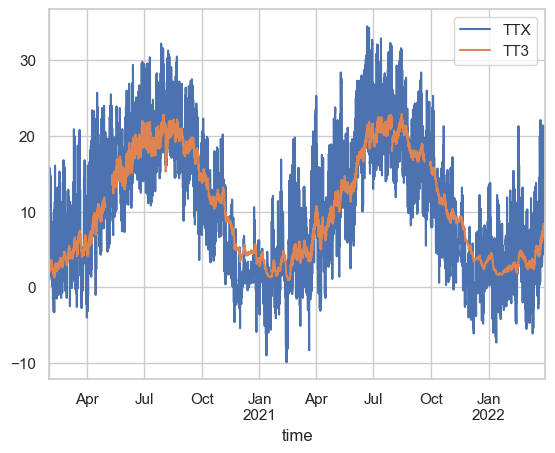

In [12]:
df[['TTX', 'TT3']]['2020-2':'2022-3'].plot()

Text(0, 0.5, 'Anzahl der Werte in der jeweiligen Klasse')

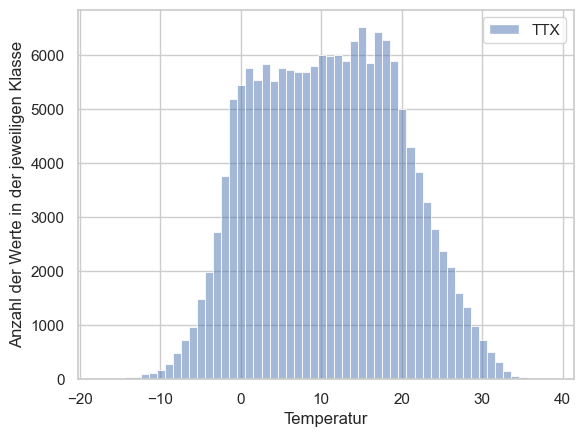

In [13]:
histogramm=sns.histplot([df['TTX']],binwidth=1, stat="count")
histogramm.set_xlabel("Temperatur")
histogramm.set_ylabel("Anzahl der Werte in der jeweiligen Klasse")

Text(0, 0.5, 'Relative Häufigkeitsdichte')

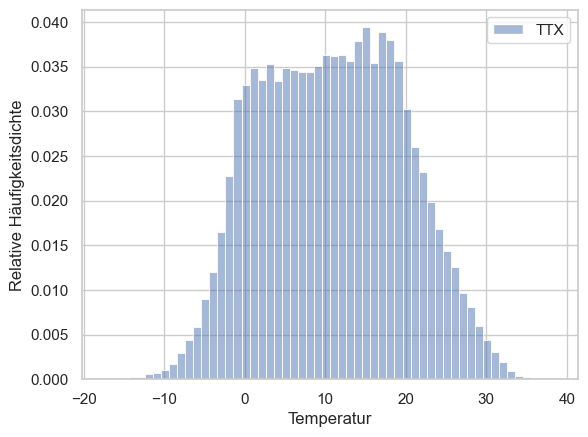

In [14]:
histogramm=sns.histplot([df['TTX']],binwidth=1, stat="density")
histogramm.set_xlabel("Temperatur")
histogramm.set_ylabel("Relative Häufigkeitsdichte")

Text(0, 0.5, 'Werte in der jeweiligen Klasse in Prozent')

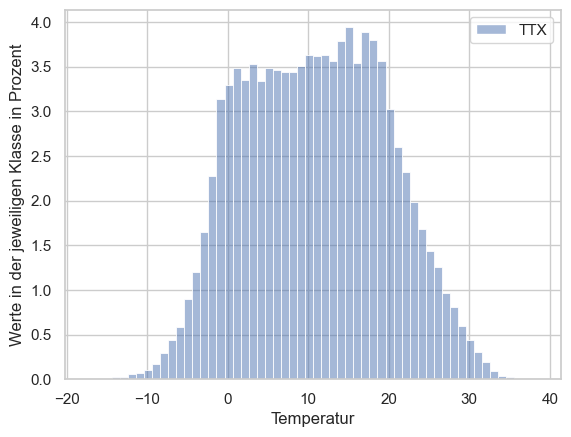

In [15]:
histogramm=sns.histplot([df['TTX']],binwidth=1, stat="percent")
histogramm.set_xlabel("Temperatur")
histogramm.set_ylabel("Werte in der jeweiligen Klasse in Prozent")

Datenlücke

<AxesSubplot: xlabel='time'>

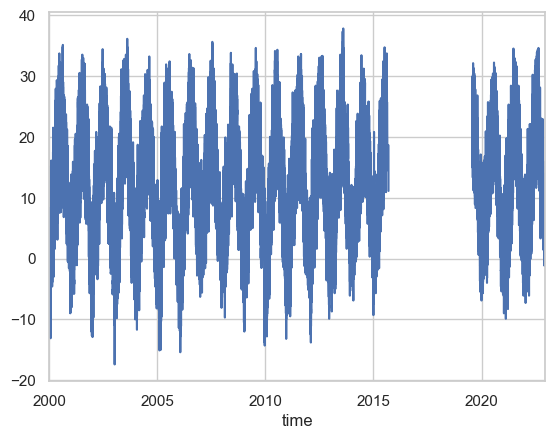

In [16]:
df['TTX'].plot()

Zeitreihen Resampling - Datengranularität

In [17]:
df_TTX = df['TTX'].resample('m').mean()

<AxesSubplot: xlabel='time'>

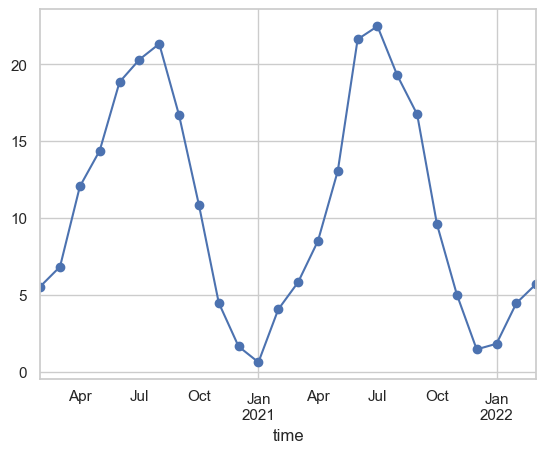

In [18]:
df_TTX['2020-2':'2022-3'].plot(marker='o')

<AxesSubplot: xlabel='time'>

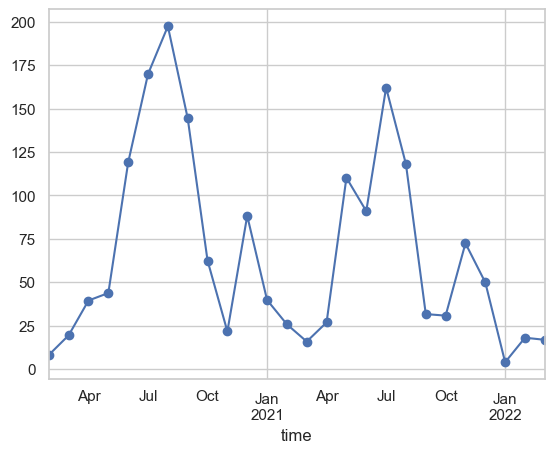

In [19]:
df_RSX = df['RSX'].resample('M').sum()
df_RSX['2020-2':'2022-3'].plot(marker='o')

Datenanalyse - Linearer Fit

In [20]:
y=np.array(df['TTX'].dropna().values, dtype=float)
x=np.array(pd.to_datetime(df['TTX'].dropna()).index.values, dtype=float)
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
xf = np.linspace(min(x),max(x),100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf)+intercept

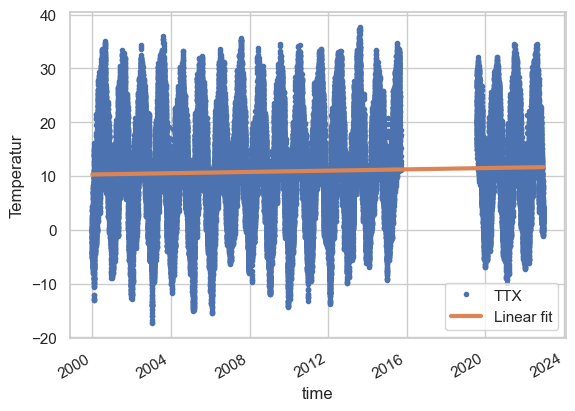

In [21]:
f, ax = plt.subplots(1, 1)
df['TTX'].plot(ax=ax,marker='.', ls='')
ax.plot(xf1, yf,label='Linear fit', lw=3)
plt.ylabel('Temperatur')
ax.legend();

Wie viel ist die mittlere Lufttemperatur in 2m Höhe vor der Uni Graz seit 2000 gestiegen?

In [22]:
yf[-1]-yf[0]

1.3699468235018148

Regressionsanalyse und Ausreißer

In [23]:
anscombe = sns.load_dataset("anscombe")

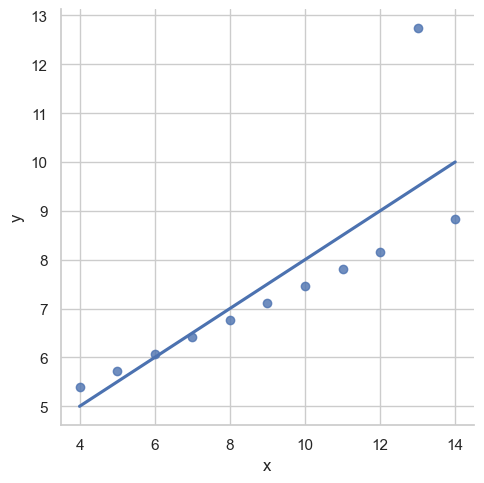

In [24]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), ci=None)

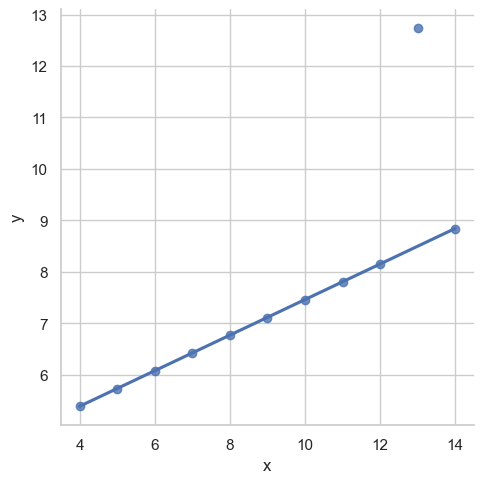

In [25]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), ci=None, robust=True)

#### Endenergieverbrauch in Österreich in TJ 1970-2021

Quelle: Statistik Austria (https://www.statistik.at/)


In [26]:
energie = pd.read_excel("Energieendverbrauch.xlsx",skiprows=9,skipfooter=8,index_col=1)
energie.drop('Zeit', axis=1, inplace=True)
energie.drop('Bilanzaggregat', axis=0, inplace=True)
energie = energie.loc[energie.index.notnull()]
energie.drop('Energetischer Endverbrauch (EE)', axis=0, inplace=True)
energie = energie.transpose().sort_index().astype(float)
energie.index.name = 'Zeit [Jahre]'
energie.index = energie.index.astype(float)

In [27]:
energie.head()

,EE Eisen- und Stahlerzeugung,EE Chemie und Petrochemie,EE Nicht Eisen Metalle,"EE Steine und Erden, Glas",EE Fahrzeugbau,EE Maschinenbau,EE Bergbau,"EE Nahrungs- und Genußmittel, Tabak",EE Papier und Druck,EE Holzverarbeitung,...,EE Textil und Leder,EE Sonst. Produzierender Bereich,EE Eisenbahn,EE Sonstiger Landverkehr,EE Transport in Rohrfernleitungen,EE Binnenschiffahrt,EE Flugverkehr,EE Offentliche und Private Dienstleistungen,EE Private Haushalte,EE Landwirtschaft
Zeit [Jahre],,,,,,,,,,,,,,,,,,,,,
1970.0,37924.099,11441.360,7484.258,32659.404,2574.133,11710.684,9252.031,18212.114,24614.517,2535.654,...,11701.814,16405.614,13030.570,94023.833,3.0,432.383,4422.969,52453.086,172836.0,31522.574
1971.0,35574.613,11891.687,6523.269,37960.600,2805.607,13048.926,10398.061,18205.163,24653.974,3034.913,...,11908.039,18227.641,12861.598,105079.956,325.0,491.141,4496.168,52586.837,161335.0,32180.058
1972.0,34275.513,12606.210,6794.358,38627.110,2870.175,13643.603,9307.944,19872.545,22828.877,3460.837,...,11985.807,18880.852,11992.255,123389.716,483.0,543.611,4519.581,55700.381,162213.0,31469.838
1973.0,37067.914,13419.549,7205.405,41531.911,3094.784,14874.009,9567.130,19904.748,24812.952,3904.861,...,12318.253,20044.964,11209.382,135755.435,542.0,606.012,4925.807,61632.831,177343.0,32542.082
1974.0,40301.692,14568.095,7433.389,38644.639,3002.126,14745.774,9563.706,20055.679,25832.456,3684.508,...,11350.024,20411.926,10500.068,126226.103,760.0,554.662,4071.468,54714.187,170761.0,30336.049


In [28]:
energie.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EE Eisen- und Stahlerzeugung,52.0,33909.542769,4114.021548,22911.020,33393.93375,34831.2755,36939.93025,40301.692
EE Chemie und Petrochemie,52.0,27175.925577,12417.769390,11441.360,13975.90100,23964.9665,37943.15925,47636.148
EE Nicht Eisen Metalle,52.0,6798.900904,1387.861621,4045.485,5929.70175,6730.1415,7509.36700,9787.437
"EE Steine und Erden, Glas",52.0,33642.455981,5434.325370,21123.724,29895.31350,34725.4820,38305.29150,41531.911
EE Fahrzeugbau,52.0,4602.658904,1239.049852,2574.133,3415.71575,4578.7210,5527.16300,6761.792
EE Maschinenbau,52.0,16933.625038,4688.603338,11198.559,12903.71350,15158.4185,21329.34025,28419.229
EE Bergbau,52.0,7564.445904,2839.127657,4306.396,5357.82425,6717.0310,8731.76500,14837.514
"EE Nahrungs- und Genußmittel, Tabak",52.0,20782.368654,2058.090541,16474.015,19216.37475,21187.4625,22177.25650,24929.386
EE Papier und Druck,52.0,52329.839288,17264.178247,22828.877,36699.97425,51948.3220,68738.67775,77018.500
EE Holzverarbeitung,52.0,13541.836346,9772.163063,2535.654,4778.00925,8479.3905,25286.90450,29929.345


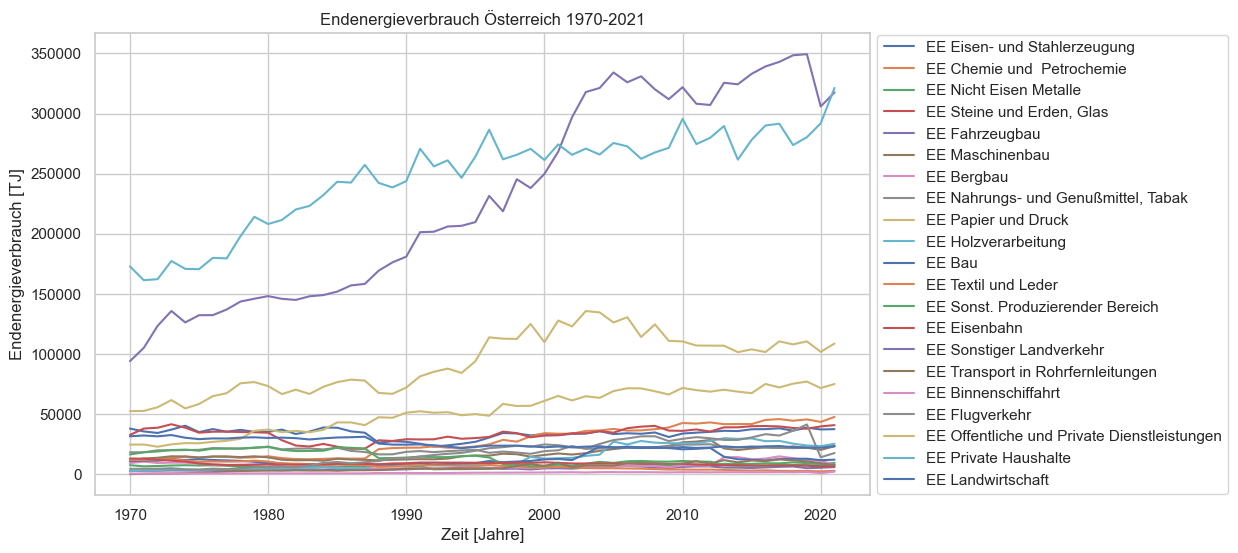

In [29]:
energie.plot(figsize=(10,6),ylabel='Endenergieverbrauch [TJ]', title='Endenergieverbrauch Österreich 1970-2021', xlabel='Zeit [Jahre]').legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

Boxplot

Text(0.5, 0, 'Endenergieverbrauch [TJ]')

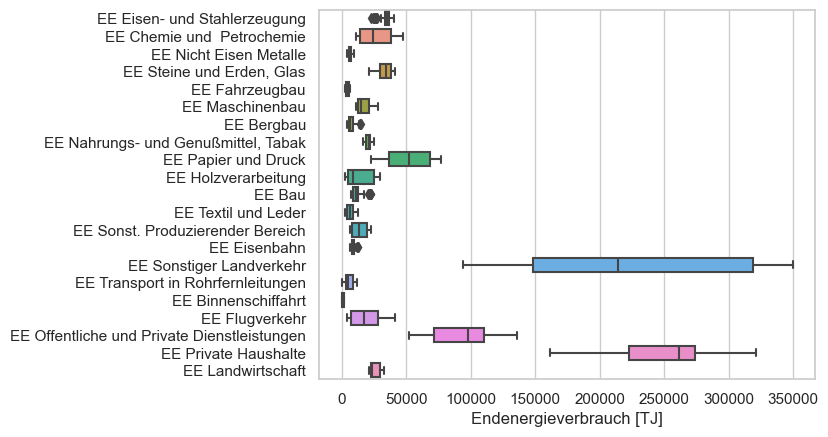

In [30]:
boxplot = sns.boxplot(data=energie, orient='h')
boxplot.set_xlabel("Endenergieverbrauch [TJ]")